In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, BSpline, UnivariateSpline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
x = np.array([0, 1, 3, 6, 8])
y = np.array([1, 3, 2, 4, 3])

In [3]:
p = splrep(x, y)
t = p[0]
c = p[1]
k = p[2]

In [4]:
print(f"\nУзлы (t): {t}")
print(f"Коэффициенты (c): {c}")
print(f"Степень (k): {k}")


Узлы (t): [0. 0. 0. 0. 3. 8. 8. 8. 8.]
Коэффициенты (c): [ 1.          4.74227642 -1.6403794   6.5171635   3.          0.
  0.          0.          0.        ]
Степень (k): 3


In [5]:
spline = BSpline(t, c, k)

In [6]:
x_new = np.linspace(x.min(), x.max(), 300)
y_new = spline(x_new)

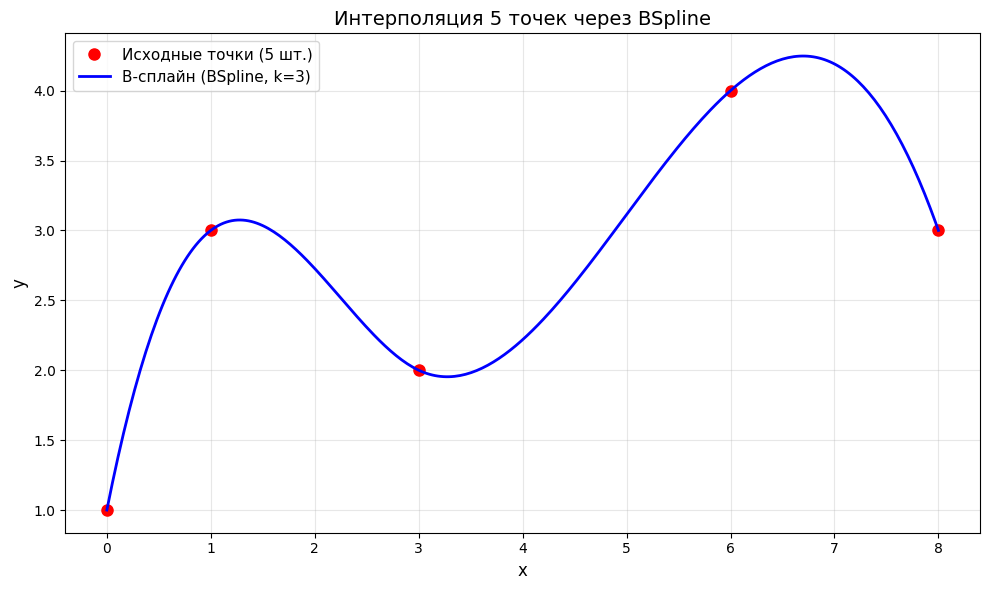

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, "o", label="Исходные точки (5 шт.)", markersize=8, color="red")
plt.plot(x_new, y_new, "-", label="B‑сплайн (BSpline, k=3)", linewidth=2, color="blue")
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Интерполяция 5 точек через BSpline", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
x_test = 4.5
y_test = spline(x_test)
print(f"\nЗначение сплайна в точке x = {x_test}: y = {y_test}")


Значение сплайна в точке x = 4.5: y = 2.624390243902439


In [9]:
spl = UnivariateSpline(x, y)

In [10]:
x_new = np.linspace(x.min(), x.max(), 300)
y_new = spl(x_new)

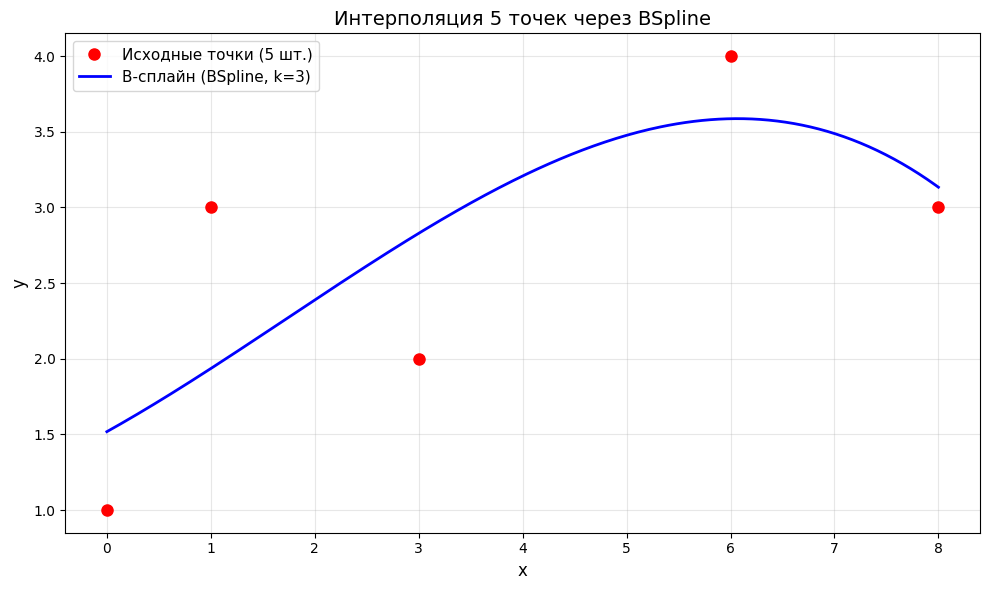

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, "o", label="Исходные точки (5 шт.)", markersize=8, color="red")
plt.plot(x_new, y_new, "-", label="B‑сплайн (BSpline, k=3)", linewidth=2, color="blue")
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Интерполяция 5 точек через BSpline", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [12]:
x_test = 4.5
y_test = spline(x_test)
print(f"\nЗначение сплайна в точке x = {x_test}: y = {y_test}")


Значение сплайна в точке x = 4.5: y = 2.624390243902439


In [13]:
x = np.array([
    [0, 1, 1],
    [1, 0, 2],
    [2, 1, 3],
    [np.nan, 2, 5],
    [4, 1, np.nan],
    [5, 1, 7],
    [5, 0, 9],
    [6, np.nan, 9],
    [6, 2, np.nan],
    [7, 1, 12]
])

y = np.array([10, 9, 8, 7, 6, 5, 4, 2, 2, 0])

In [14]:
x_new = x.copy()
x_index = np.arange(len(x))

In [15]:
for col in range(3):
    mask = ~np.isnan(x[:, col])
    valid_indices = x_index[mask]
    valid_values = x[mask, col]

    spline = splrep(valid_indices, valid_values)
    result = x_index[~mask]

    for i in result:
        x_new[i, col] = BSpline(*spline)(i)

print("Исходная матрица x:")
print(x)
print("\nМатрица x с заполненными пропусками:")
print(x_new)
print("\nВектор y:")
print(y)

Исходная матрица x:
[[ 0.  1.  1.]
 [ 1.  0.  2.]
 [ 2.  1.  3.]
 [nan  2.  5.]
 [ 4.  1. nan]
 [ 5.  1.  7.]
 [ 5.  0.  9.]
 [ 6. nan  9.]
 [ 6.  2. nan]
 [ 7.  1. 12.]]

Матрица x с заполненными пропусками:
[[ 0.          1.          1.        ]
 [ 1.          0.          2.        ]
 [ 2.          1.          3.        ]
 [ 2.92890717  2.          5.        ]
 [ 4.          1.          5.95269929]
 [ 5.          1.          7.        ]
 [ 5.          0.          9.        ]
 [ 6.          0.74515434  9.        ]
 [ 6.          2.          8.86528759]
 [ 7.          1.         12.        ]]

Вектор y:
[10  9  8  7  6  5  4  2  2  0]


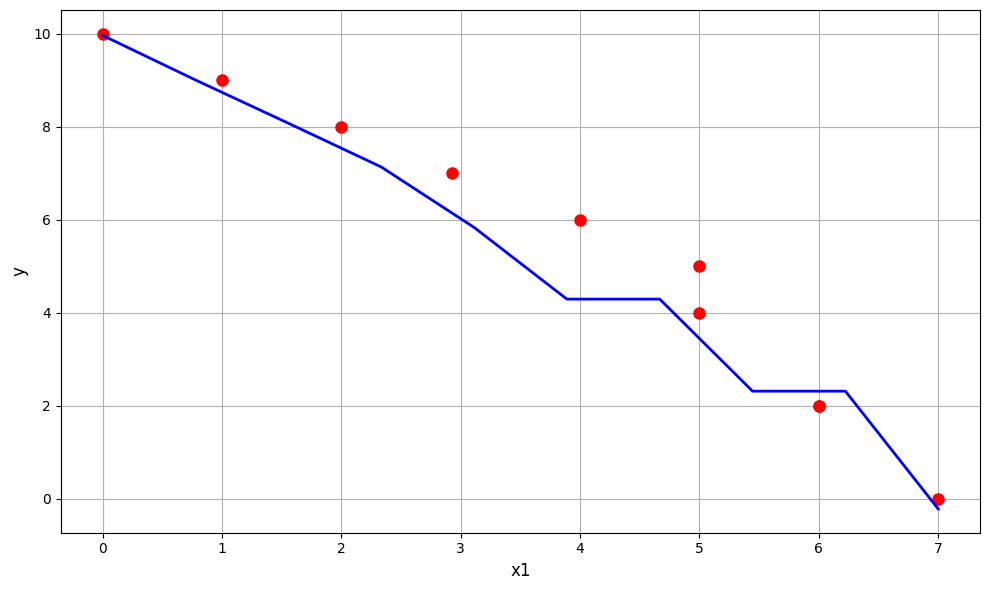

/tmp/ipython-input-3918497101.py:3: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  spl = UnivariateSpline(x_sort, y)


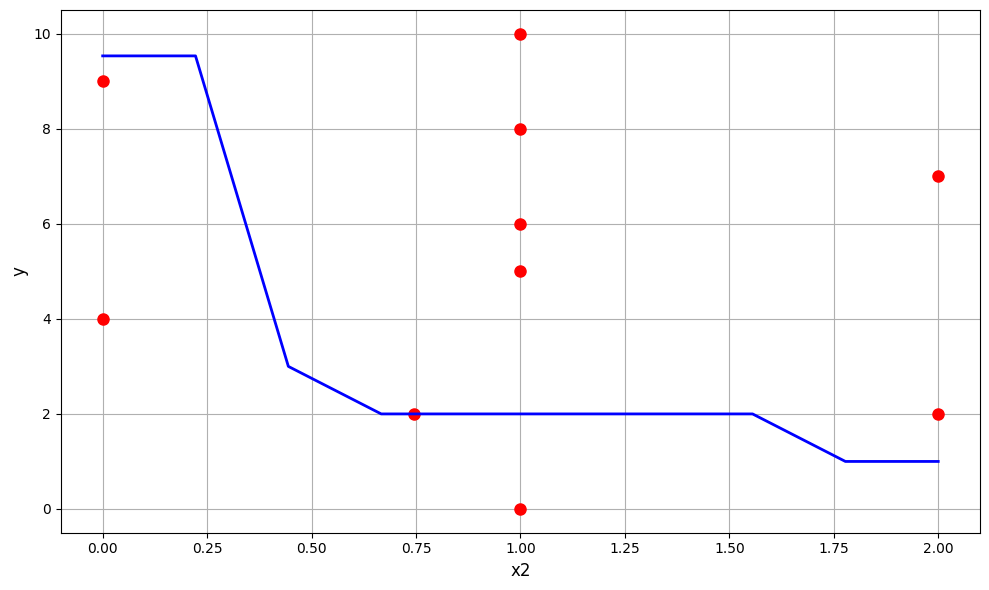

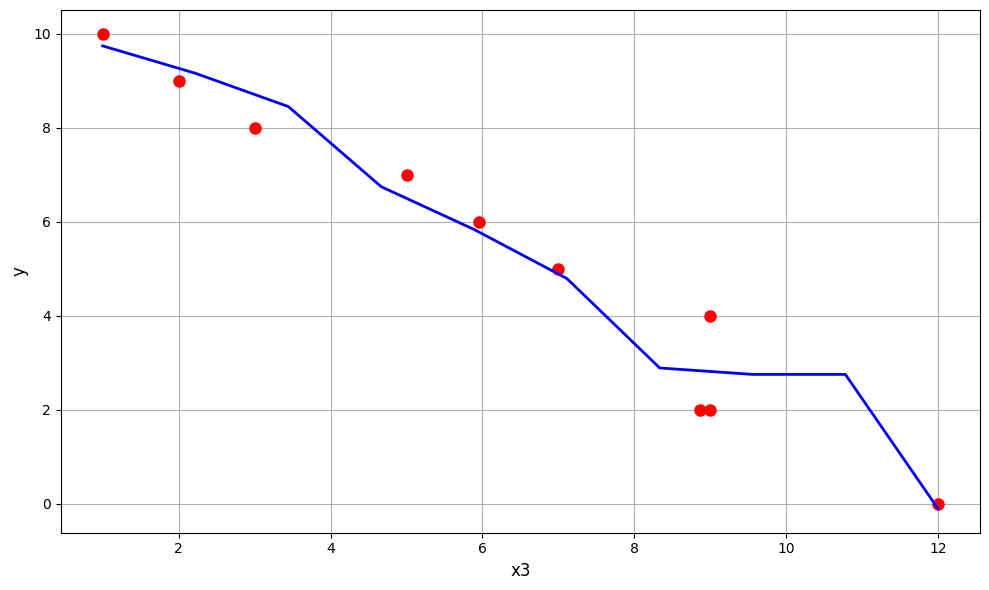

In [16]:
for i in range(3):
    x_sort = np.sort(x_new[:, i])
    spl = UnivariateSpline(x_sort, y)

    x_ = np.linspace(x_sort.min(), x_sort.max(), 10)
    y_ = spl(x_sort)

    plt.figure(figsize=(10, 6))
    plt.plot(x_new[:, i], y, "o", markersize=8, color="red")
    plt.plot(x_, y_, "-", linewidth=2, color="blue")
    plt.xlabel(f"x{i + 1}", fontsize=12)
    plt.ylabel("y", fontsize=12)

    plt.grid()
    plt.tight_layout()
    plt.show()